# Computational Statistics

### Processing the data

In [1]:
from spacy.lang.en.stop_words import STOP_WORDS
from functools import lru_cache
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from collections import Counter, defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import re
from io import StringIO
import matplotlib.pyplot as plt


def eda(sentences):
    processed_sentences = []

    for s in sentences:
        # Remove all the special characters
        processed_sentence = re.sub(r'\W', ' ', str(s))

        # remove all single characters
        processed_sentence= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_sentence)

        # Remove single characters from the start
        processed_sentence = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_sentence) 

        # Substituting multiple spaces with single space
        processed_sentence = re.sub(r'\s+', ' ', processed_sentence, flags=re.I)

        # Removing prefixed 'b'
        processed_sentence = re.sub(r'^b\s+', '', processed_sentence)

        # Converting to Lowercase
        processed_sentence = processed_sentence.lower()

        processed_sentences.append(processed_sentence)
        
    return processed_sentences

@lru_cache(maxsize=128)
def getData(method):
  wd = os.getcwd()
  transcripts = []
  dino_df = pd.DataFrame()
  km_df = pd.DataFrame()
  dino_ts = {}
  
  cachedStopWords = list(set(stopwords.words("english") + list(STOP_WORDS) + list(STOPWORDS) + ['thing','okay','um','so data','lot','someone','need','find','unknown','speaker','so data','okay so','so','unknown speaker','actually','many','make','people','ten','go','see','want','yeah','zero','two','three','four','five','six','eight','nine','going','okay','one','say','look','hundred','minus','little','let','um','uh','unknown','right','know','user','avatar','dino','konstantopoulos','yutong','gao']))
  #'sure','little','speaker','things','lot','think','work','way','new','one','number','different','yeah','probability','use','zero','actually' ,'function','say','look','want' ,'okay' ,'let', 'going', 'machine', 'learning', 'data',
  pattern = re.compile(r'\b(' + r'|'.join(cachedStopWords) + r')\b\s*')
  pattern2 = r'[0-9]'
  custom = ['so data','lot','someone','need','find','unknown','speaker','so data','okay so','so','unknown speaker','actually','many','make','people','ten','go','see','want','yeah','zero','two','three','four','five','six','eight','nine','going','okay','one','say','look','hundred','minus','little','let','um','uh','unknown','right','know','user','avatar','dino','konstantopoulos','yutong','gao']
  pattern3 = re.compile(r'\b(' + r'|'.join(custom) + r')\b\s*')
  
  all_words = ""
    
  for files in os.listdir(wd+"/Dino-Until-Nov-21"):
    str1 = open(wd+"/Dino-Until-Nov-21/"+files, 'r',encoding="utf8").read()   
    str1 = str1.replace("so", "")
    StringData = StringIO(str1)
    df = pd.read_csv(StringData, sep ="\r\n",header=None)
    df['Relevant_Date'] = files.split(".")[0]
    km_df = pd.concat([km_df,df])
    dino_df = pd.concat([dino_df,df])
    str1 = eda([str1])[0]
    str1 = re.sub(pattern,'',str1)
    str1 = re.sub(pattern2,'',str1)  
    str1 = re.sub(pattern3,'',str1)  
    dino_ts[files] = str1
    transcripts.append(str1)
    all_words = all_words + str1
    
  dino = " ".join(map(str, transcripts))  
  
  transcripts = [eda([x])[0] for x in transcripts]
  
  dino_df.iloc[:,0] = dino_df.iloc[:,0].apply(lambda x :  re.sub(pattern, '', x))
  dino_df.iloc[:,0] = dino_df.iloc[:,0].apply(lambda x :  re.sub(pattern2, '', x))
  dino_df.iloc[:,0] = dino_df.iloc[:,0].apply(lambda x :  re.sub(pattern3, '', x))
  dino_df.iloc[:,0] = dino_df.iloc[:,0].apply(lambda x :  re.sub(r'[^\w\s]','',x))
  dino_df.iloc[:,0] = dino_df.iloc[:,0].apply(lambda x : eda([x])[0])
  dino_df = dino_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
  dino_df = dino_df[((dino_df.iloc[:,0]!=''))]
  dino_df = dino_df[(dino_df.iloc[:,0].str.split().str.len() > 2)]
  
  
  km_df.iloc[:,0] = km_df.iloc[:,0].apply(lambda x :  re.sub(pattern3, '', x))
  km_df = km_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
  km_df = km_df[((km_df.iloc[:,0]!=''))]
  km_df = km_df[(km_df.iloc[:,0].str.split().str.len() > 2)]
  
  corpus = km_df.iloc[:,0].to_list()
  
  #Important Paramter #1
  corpus = list(map(''.join, zip(*([iter(corpus)]*3))))  

  customn = ['so','then','thing','okay','right','um','al','rry','mm']
  all_words_list = all_words.split()
  for word in custom:
      while word in all_words_list:
          dino_df.iloc[:,0] = dino_df.iloc[:,0].str.replace(word,"")
          km_df.iloc[:,0] = km_df.iloc[:,0].str.replace(word,"")
          all_words_list.remove(word)
        
  if method == "Computational":
    return km_df
  elif method == 'EDA':
    return [dino_df,dino_ts,transcripts]
  elif method == 'AllWords':
    return all_words_list


### Getting data

In [2]:
dino_df = getData("Computational")
dino_df

,0,Relevant_Date
0,The only question.,Nov-10
10,Wait another requirements. Three minutes.,Nov-10
18,". So , i'm thinking we postpone the correction...",Nov-10
19,because there's nobody here,Nov-10
20,"and , and we just do a review of what we did l...",Nov-10
...,...,...
625,So once again all the lectures are to be recor...,Sep-8
626,Thank you. Tas . Not all. Tas are to be here. ...,Sep-8
628,So you're to have to learn to use. You can use...,Sep-8
629,"Oh, that's good.",Sep-8


In [3]:
all_words_list = getData('AllWords')
len(all_words_list)

69532

### Distribution of number of words in each sentence

Text(0.5, 1.0, 'Distribution of number of words in each sentence')

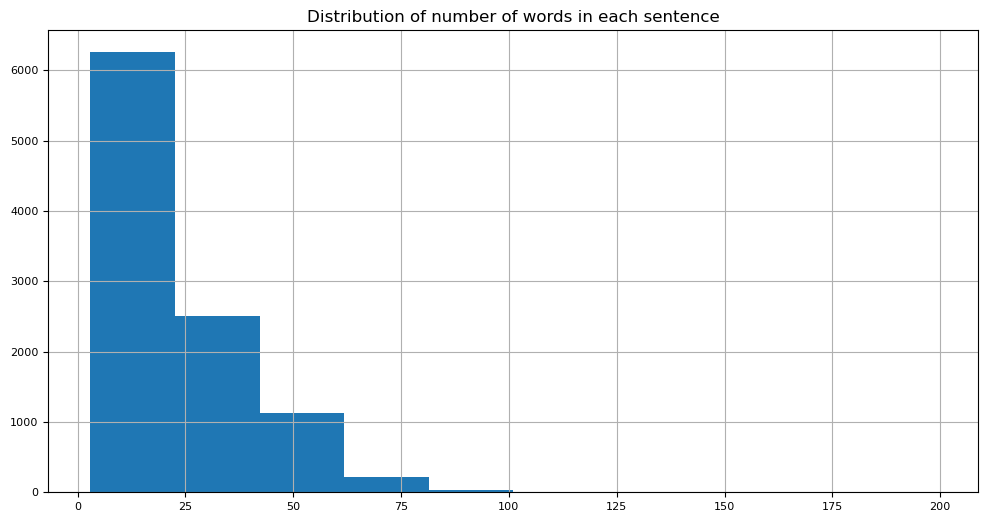

In [4]:
dino_df['NumWords'] = dino_df[0].apply(lambda x: len(x.split()))
dino_df[['NumWords']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8);
plt.title("Distribution of number of words in each sentence")

In [5]:
all_words = ' '.join(all_words_list)

In [6]:
all_words = all_words.replace('thing','')
all_words = all_words.replace('basebl','')
all_words = all_words.replace('overl','')

### Process data with Spacy NLP Parser

In [7]:
import spacy

nlp = spacy.load('en_core_web_sm')
processed_text = nlp(all_words)

In [8]:
type(processed_text)

spacy.tokens.doc.Doc

In [9]:
len(processed_text)

69683

### Extracting all location occurrences and their count

In [10]:
from collections import Counter, defaultdict

def find_location_occurences(doc):
    
    locations = Counter()
    for ent in doc.ents:
        if ent.label_ == 'GPE':
            locations[ent.lemma_] += 1
            
    return locations.most_common()

print(find_location_occurences(processed_text)[:20])

[('paris', 6), ('massachusetts', 6), ('china', 6), ('anaconda', 5), ('bayesian', 4), ('new york city', 4), ('california', 3), ('india', 3), ('boston', 3), ('chicago', 3), ('rome', 3), ('uganda', 3), ('tibet', 3), ('australia', 2), ('tenr', 2), ('indiana', 2), ('mexico', 2), ('vermont', 2), ('canada', 2), ('hollywood', 2)]


### Plot places' mentions as a time series relative to the time at which professor named it.

In [11]:
def get_location_offsets(doc):
    
    location_offsets = defaultdict(list)
    for ent in doc.ents:
        if ent.label_ == 'GPE':
            location_offsets[ent.lemma_].append(ent.start)
            
    return dict(location_offsets)

location_occurences = get_location_offsets(processed_text)

In [12]:
print(list(location_occurences.keys()))

['west crystal', 'australia', 'paris', 'manchester city', 'bayesian', 'tenr', 'massachusetts', 'indiana', 'california', 'netherlands', 'germany', 'america', 'philadelphia', 'san francisco', 'mexico', 'florida', 'india', 'boston', 'los alamos new mexico', 'vermont', 'new hampshire', 'south africa', 'new york city', 'chicago', 'michigan lake', 'michigan', 'london', 'new york', 'canada', 'ssm', 'rome', 'minneta county', 'radon', 'statistic county', 'uk', 'uganda', 'nashville', 'tennessee', 'china', 'hollywood', 'shanghai', 'anaconda', 'netherland', 'france', 'andre', 'pern percent', 'las vegas', 'thailand', 'jupiter notebooks', 'tibet']


### Most common nouns used by Professor

In [13]:
doc = processed_text

keywords = Counter()
for chunk in doc.noun_chunks:
    if nlp.vocab[chunk.lemma_].prob < -8 : # probablity value -8 is arbitrarily selected threshold
        keywords[chunk.lemma_] += 1

keywords.most_common(20)

[('I', 320),
 ('al', 161),
 ('datum', 102),
 ('function', 71),
 ('time', 62),
 ('number', 57),
 ('everybody', 52),
 ('probability', 51),
 ('column', 47),
 ('word', 41),
 ('value', 38),
 ('simulation', 37),
 ('s', 36),
 ('example', 34),
 ('parameter', 28),
 ('driver', 25),
 ('python', 23),
 ('way', 22),
 ('statistic', 22),
 ('seven driver', 21)]

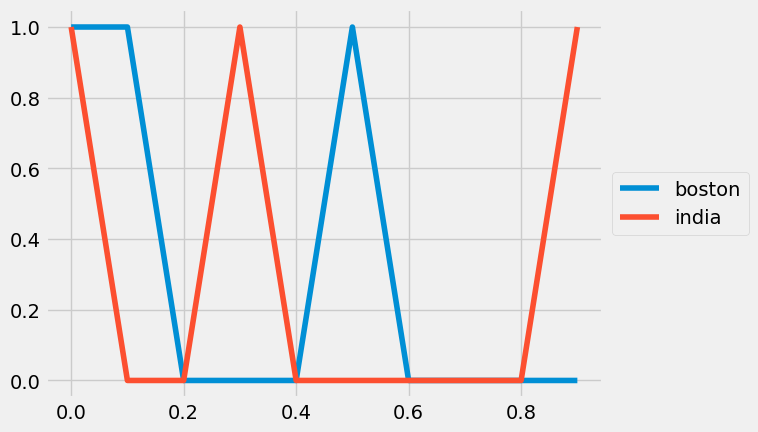

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import hist
from cycler import cycler

NUM_BINS = 10

def normalize(occurencies, normalization_constant):
    return [o / float(len(processed_text)) for o in occurencies]

def plot_character_timeseries(location_offsets, location_labels, normalization_constant=None):
    """
    Plot characters' personal names specified in `character_labels` list as time series.
    
    :param character_offsets: dict object in form {'xxx': [123, 543, 4534], 'yyy': [205, 2111]}
    :param character_labels: list of strings that should match some of the keys in `character_offsets`
    :param normalization_constant: int
    """ 
    x = [location_offsets[location_label] for location_label in location_labels] 
        
    with plt.style.context('fivethirtyeight'):
        plt.figure()
        n, bins, patches = plt.hist(x, NUM_BINS, label=location_labels)
        plt.clf()
        
        ax = plt.subplot(111)
        for i, a in enumerate(n):
            ax.plot([float(x) / (NUM_BINS) for x in range(len(a))], a, label=location_labels[i])
            
        plt.rcParams['axes.prop_cycle'] = cycler(color=['r','k','c','b','y','m','g','#54a1FF'])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plot_character_timeseries(character_occurences, ['darcy', 'bingley'], normalization_constant=len(processed_text))
plot_character_timeseries(location_occurences, ['boston', 'india'])

### Function to get the occurences of a list of words in a sentence as a dictionary

In [15]:
def get_words(sentences, words):
    
    word_sentence = defaultdict(list)
    for p in sentences:
        for w in words:
            word_sentence[w].append(p.count(w))
            
    return dict(word_sentence)

### Plotting the occurence of the words 'algebra' and 'regression'

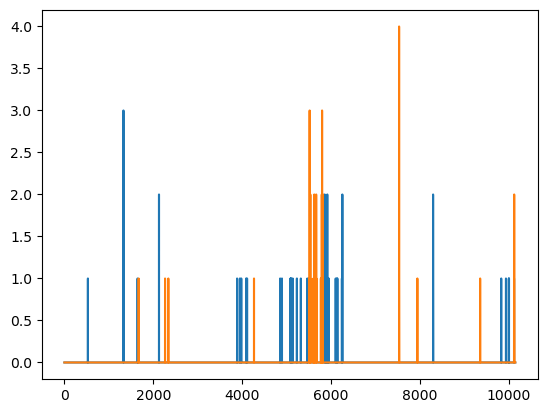

In [16]:
algebra_regression_occurences = get_words(dino_df[0], ['algebra', 'regression'])
algebra_occurences = [v for k,v in algebra_regression_occurences.items() if k == 'algebra'][0]
regression_occurences = [v for k,v in algebra_regression_occurences.items() if k == 'regression'][0]
plt.plot(algebra_occurences)
plt.plot(regression_occurences)

### Plotting the occurence of the word 'linear'

In [17]:
linear = ['linear']

100%|████████████████████████████████| 10148/10148 [00:00<00:00, 1273755.00it/s]


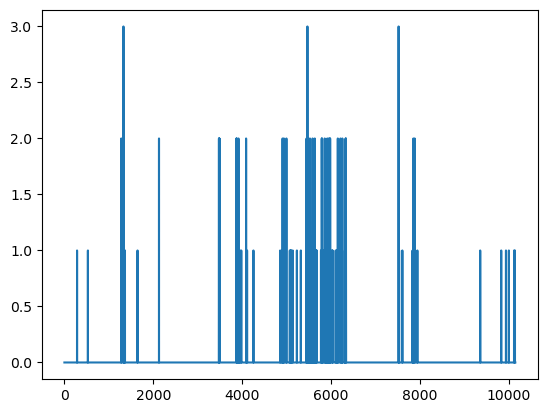

In [18]:
from tqdm import tqdm

def get_any_words_sentences(sentences, words):
    
    word_sentence = []
    for p in tqdm(sentences):
        total = 0
        for w in words:
            total += p.count(w)
        word_sentence.append(total)
            
    return word_sentence

linear_occurences = get_any_words_sentences(dino_df[0], linear)
plt.plot(linear_occurences)

### Plotting occurences of all three words together

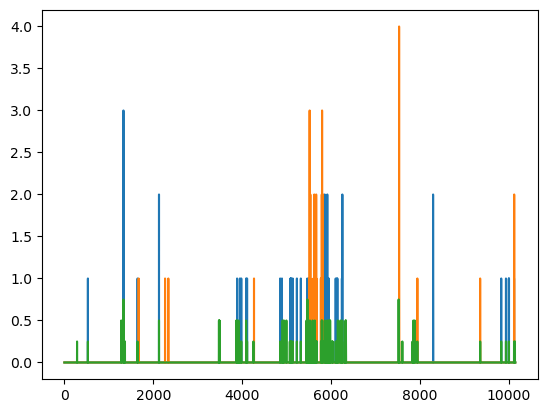

In [19]:
plt.plot(algebra_occurences)
plt.plot(regression_occurences)
plt.plot([m / 4 for m in  linear_occurences])

### All occurrences of the three words zipped together in a dataframe

In [20]:
df_linear = pd.DataFrame(list(zip(linear_occurences, algebra_occurences, regression_occurences)), 
                        columns =['linear', 'algebra', 'regression'])
df_linear

,linear,algebra,regression
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
10143,0,0,0
10144,0,0,0
10145,0,0,0
10146,0,0,0


In [21]:
bool_algebra_occurences = [bool(v) for v in algebra_occurences]
bool_regression_occurences = [bool(v) for v in regression_occurences]

In [22]:
df_linear2 = pd.DataFrame(list(zip(linear_occurences, bool_algebra_occurences, bool_regression_occurences)), 
                        columns =['linear', 'algebra_bool', 'regression_bool'])
df_linear2

,linear,algebra_bool,regression_bool
0,0,False,False
1,0,False,False
2,0,False,False
3,0,False,False
4,0,False,False
...,...,...,...
10143,0,False,False
10144,0,False,False
10145,0,False,False
10146,0,False,False


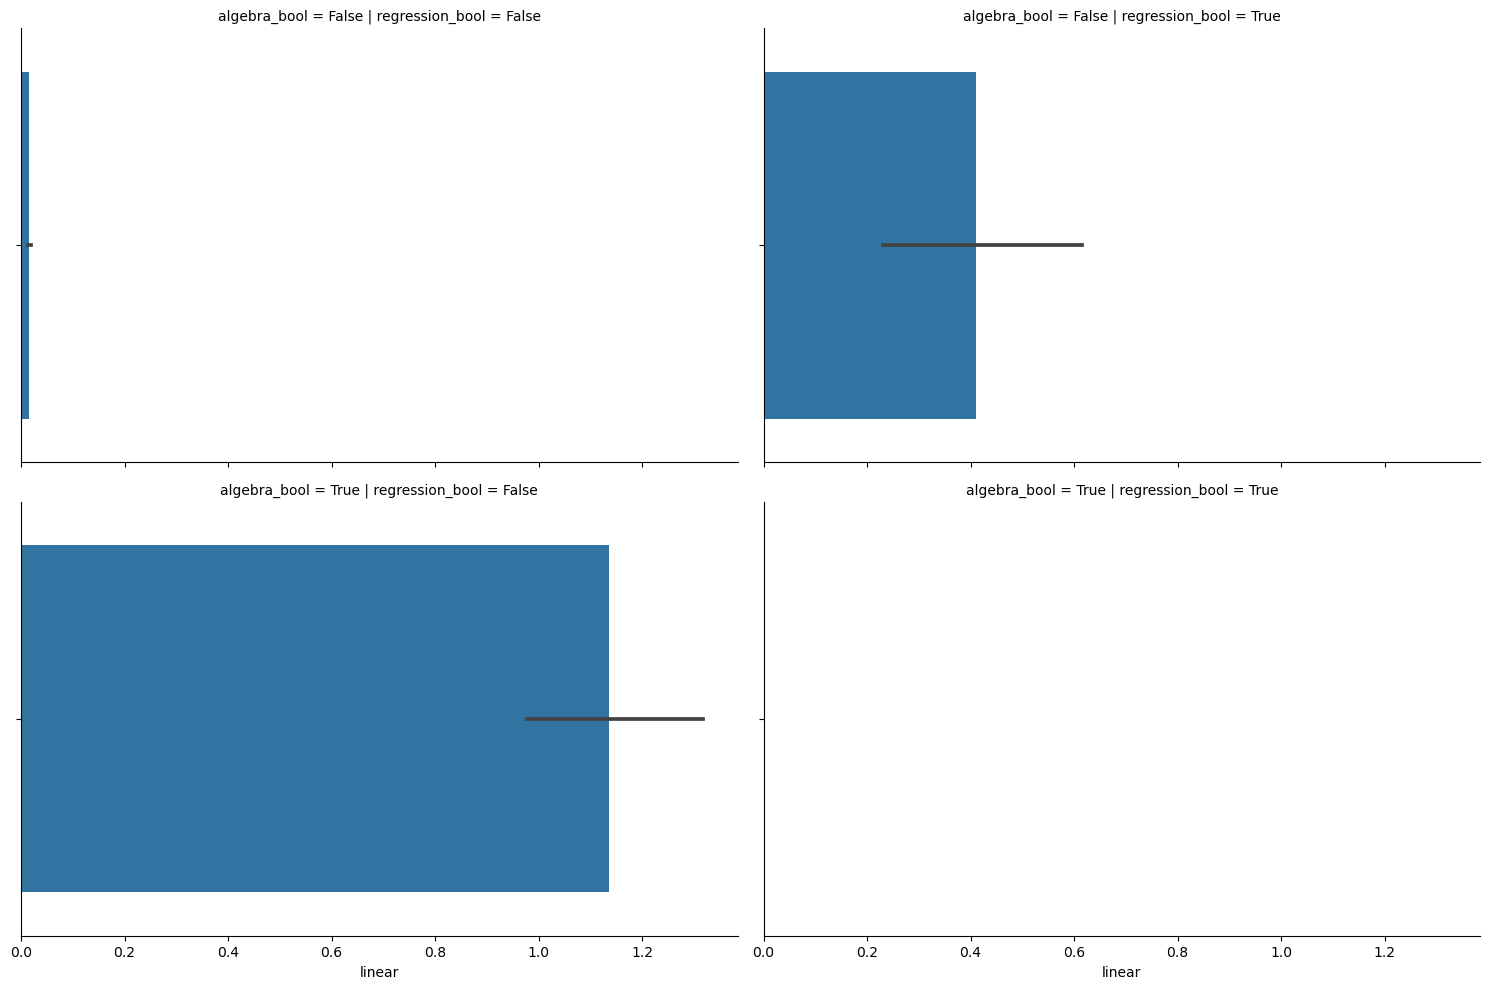

In [23]:
import seaborn as sns

g = sns.catplot(x='linear', row='algebra_bool', col='regression_bool', data=df_linear2, kind='bar', aspect=1.5)

In [24]:
import pymc3 as pm

fml = 'linear ~ algebra + regression'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=df_linear, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(4000, cores=4)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, mu, regression, algebra, Intercept]


/Users/sho7/opt/anaconda3/envs/sample/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sho7/opt/anaconda3/envs/sample/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sho7/opt/anaconda3/envs/sample/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 54 seconds.


In [25]:
def plot_traces(trcs, varnames=None):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs.varnames)
    if varnames is not None:
        nrows = len(varnames)

    ax = pm.traceplot(trcs, var_names=varnames, figsize=(12,nrows*1.4),
                      lines={k: v['mean'] for k, v in
                             pm.summary(trcs,var_names=varnames).iterrows()})

    for i, mn in enumerate(pm.summary(trcs, var_names=varnames)['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data',
                         xytext=(5,10), textcoords='offset points', rotation=90,
                         va='bottom', fontsize='large', color='#AA0022')

def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log',rv.name) or re.search('_interval',rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

In [26]:
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
rvs

['Intercept', 'algebra', 'regression', 'mu', 'alpha']

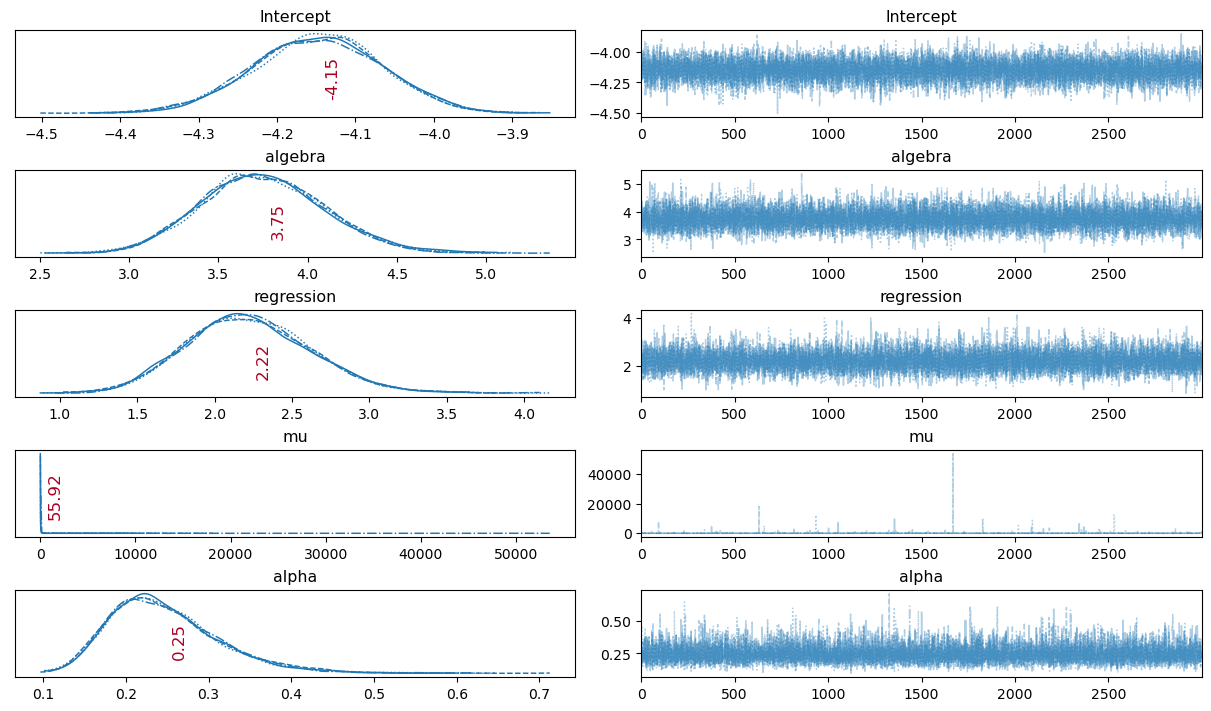

In [27]:
plot_traces(trace[1000:], varnames=rvs)

In [28]:
# Transform coefficients to recover parameter values
np.exp(pm.summary(trace[1000:], var_names=rvs))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,1.579598e-02,1.085456e+00,0.013637,1.848122e-02,1.001001,1.001001,inf,inf,2.718282
algebra,4.260621e+01,1.413403e+00,22.533430,8.112572e+01,1.003005,1.002002,inf,inf,2.718282
regression,9.244234e+00,1.496307e+00,4.428230,1.945297e+01,1.004008,1.003005,inf,inf,2.718282
mu,1.934711e+24,4.514388e+273,1.002002,2.315605e+45,1358.314674,164.186011,inf,inf,2.718282
alpha,1.280179e+00,1.069295e+00,1.142250,1.447735e+00,1.001001,1.000000,inf,inf,2.718282


In [29]:
print(all_words.count('linear algebra'))
print(all_words.count('linear regression'))
print(len(all_words))

47
13
498288


In [30]:
math_words = ['algebra','algorithm','angle','area','array','base','bell curve','binomial','calculus','constant','coordinate','coefficient','cosine','equation','evaluate','exponent','factor','fibonacci','figure','finite','formula','factoring','frequency','geometry','histogram','identity','integers','logarithm','mean','multiplication','multiple','normal distribution','norm','percent','probability','ratio','rectangle',
 'repeating decimal',
 'reflection',
 'remainder',
 'right angle',
 'right triangle',
 'rhombus',
 'scalene triangle',
 'sector',
 'slope',
 'square root',
 'stem and leaf',
 'subtraction',
 'supplementary angles',
 'symmetry',
 'tangent',
 'term',
 'tessellation',
 'translation',
 'transversal',
 'trapezoid',
 'tree diagram',
 'triangle',
 'trinomial',
 'unit',
 'uniform',
 'variable',
 'venn diagram',
 'volume',
 'vertex',
 'weight',
 'whole number',
 'x-axis',
 'x-intercept',
 'x',
 'x',
 'y-axis',
 'y-intercept',
 'yard']
#math_words

In [31]:
statistics_words = pd.read_excel('statistics_words.xlsx', usecols=[0])
statistics_words = statistics_words['Words'].str.lower()
statistics_words = statistics_words.values.tolist()
statistics_words = [sub[: -1] for sub in statistics_words]
statistics_words

['0-1 box',
 'affine transformation',
 'affirming the antecedent',
 'affirming the consequent',
 'alternative hypothesis',
 'ante',
 'antecedent',
 'appeal to ignorance',
 'applet',
 'association',
 'average',
 'axioms of probability',
 'base rate fallacy',
 "bayes' rule",
 "bernoulli's inequality",
 'bias',
 'bimodal',
 'bin',
 'binomial coefficient',
 'binomial distribution',
 'binomial theorem',
 'bivariate',
 'blind, blind experiment',
 'box model',
 'breakdown point',
 'categorical variable',
 'causation, causal relation',
 'central limit theorem',
 'certain event',
 'chance variation, chance error',
 'change of units or variables',
 "chebychev's inequality",
 'chi-square curve',
 'chi-square statistic',
 'class boundary',
 'class interval',
 'cluster sample',
 'combinations',
 'complement',
 'complement rule',
 'compound proposition',
 'conditional probability',
 'confidence interval',
 'confidence level',
 'confounding',
 'continuity correction',
 'consequent',
 'continuous vari

In [32]:
data_science_words = pd.read_excel('data_science_words.xlsx', usecols=[0])
data_science_words['Words'] = data_science_words['Words'].str.lower()
data_science_words = data_science_words['Words'].values.tolist()
data_science_words

['algorithm',
 'angularjs',
 'artificial intelligence',
 'backpropagation',
 "bayes' theorem",
 'bayesian network',
 'bias',
 'big data',
 'binomial distribution',
 'chi-square test',
 'classification',
 'clustering',
 'coefficient',
 'computational linguistics',
 'confidence interval',
 'continuous variable',
 'correlation',
 'covariance',
 'cross-validation',
 'd3',
 'data engineer',
 'data mining',
 'data science',
 'data structure',
 'data wrangling',
 'decision trees',
 'deep learning',
 'dependent variable',
 'dimension reduction',
 'discrete variable',
 'econometrics',
 'feature',
 'feature engineering',
 'gate',
 'gradient boosting',
 'gradient descent',
 'histogram',
 'independent variable',
 'javascript',
 'k-means clustering',
 'k-nearest neighbors',
 'latent variable',
 'lift',
 'linear algebra',
 'linear regression',
 'logarithm',
 'logistic regression',
 'machine learning',
 'machine learning model',
 'markov chain',
 'matlab',
 'matrix',
 'mean',
 'mean absolute error',


### Plotting mathematical and statistical words together

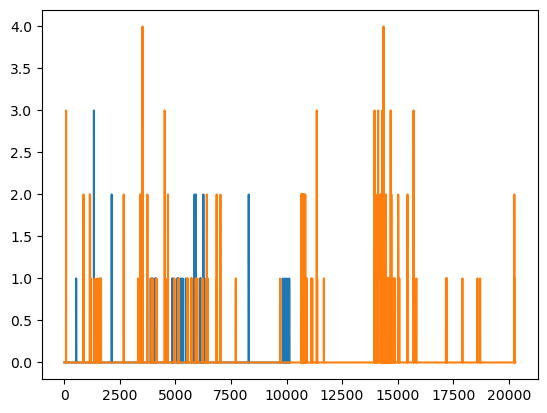

In [33]:
math_statistics_words_occurences = get_words(dino_df[0], math_words + statistics_words)
math_words_occurences = [v for k,v in math_statistics_words_occurences.items() if k in math_words][0]
statistics_words_occurences = [v for k,v in math_statistics_words_occurences.items() if k in statistics_words][0]
#plt.plot(data_science_occurences)
plt.plot(math_words_occurences)
plt.plot(statistics_words_occurences)

### Plotting data science words

100%|██████████████████████████████████| 10148/10148 [00:00<00:00, 50591.26it/s]


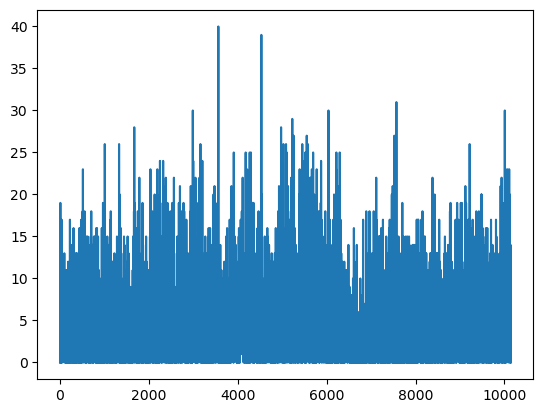

In [34]:
data_science_words_occurences = get_any_words_sentences(dino_df[0], data_science_words)
plt.plot(data_science_words_occurences)

### Plotting mathematical, statistacal and data science words together

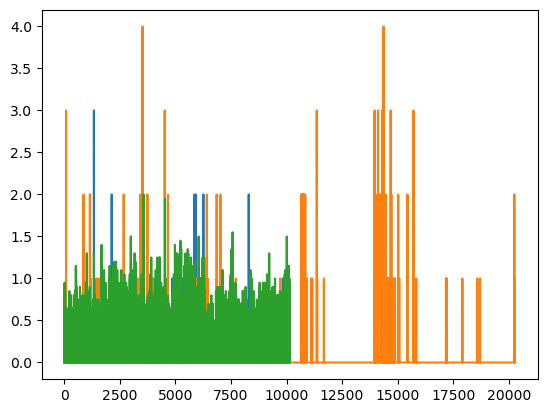

In [35]:
plt.plot(math_words_occurences)
plt.plot(statistics_words_occurences)
plt.plot([m / 20 for m in  data_science_words_occurences])

In [36]:
bool_math_words_occurences = [bool(v) for v in math_words_occurences]
bool_statistics_words_occurences = [bool(v) for v in statistics_words_occurences]

In [37]:
df_math_statistics = pd.DataFrame(list(zip(data_science_words_occurences, math_words_occurences, statistics_words_occurences)), 
                        columns =['data_science', 'math_words', 'statistics_words'])
df_math_statistics

,data_science,math_words,statistics_words
0,0,0,0
1,4,0,0
2,3,0,0
3,2,0,0
4,1,0,0
...,...,...,...
10143,9,0,0
10144,9,0,0
10145,5,0,0
10146,0,0,0


In [38]:
df_math_statistics2 = pd.DataFrame(list(zip(data_science_words_occurences, bool_math_words_occurences, bool_statistics_words_occurences)), 
                        columns =['data_science', 'math_words_p', 'statistics_words_p'])
df_math_statistics2

,data_science,math_words_p,statistics_words_p
0,0,False,False
1,4,False,False
2,3,False,False
3,2,False,False
4,1,False,False
...,...,...,...
10143,9,False,False
10144,9,False,False
10145,5,False,False
10146,0,False,False


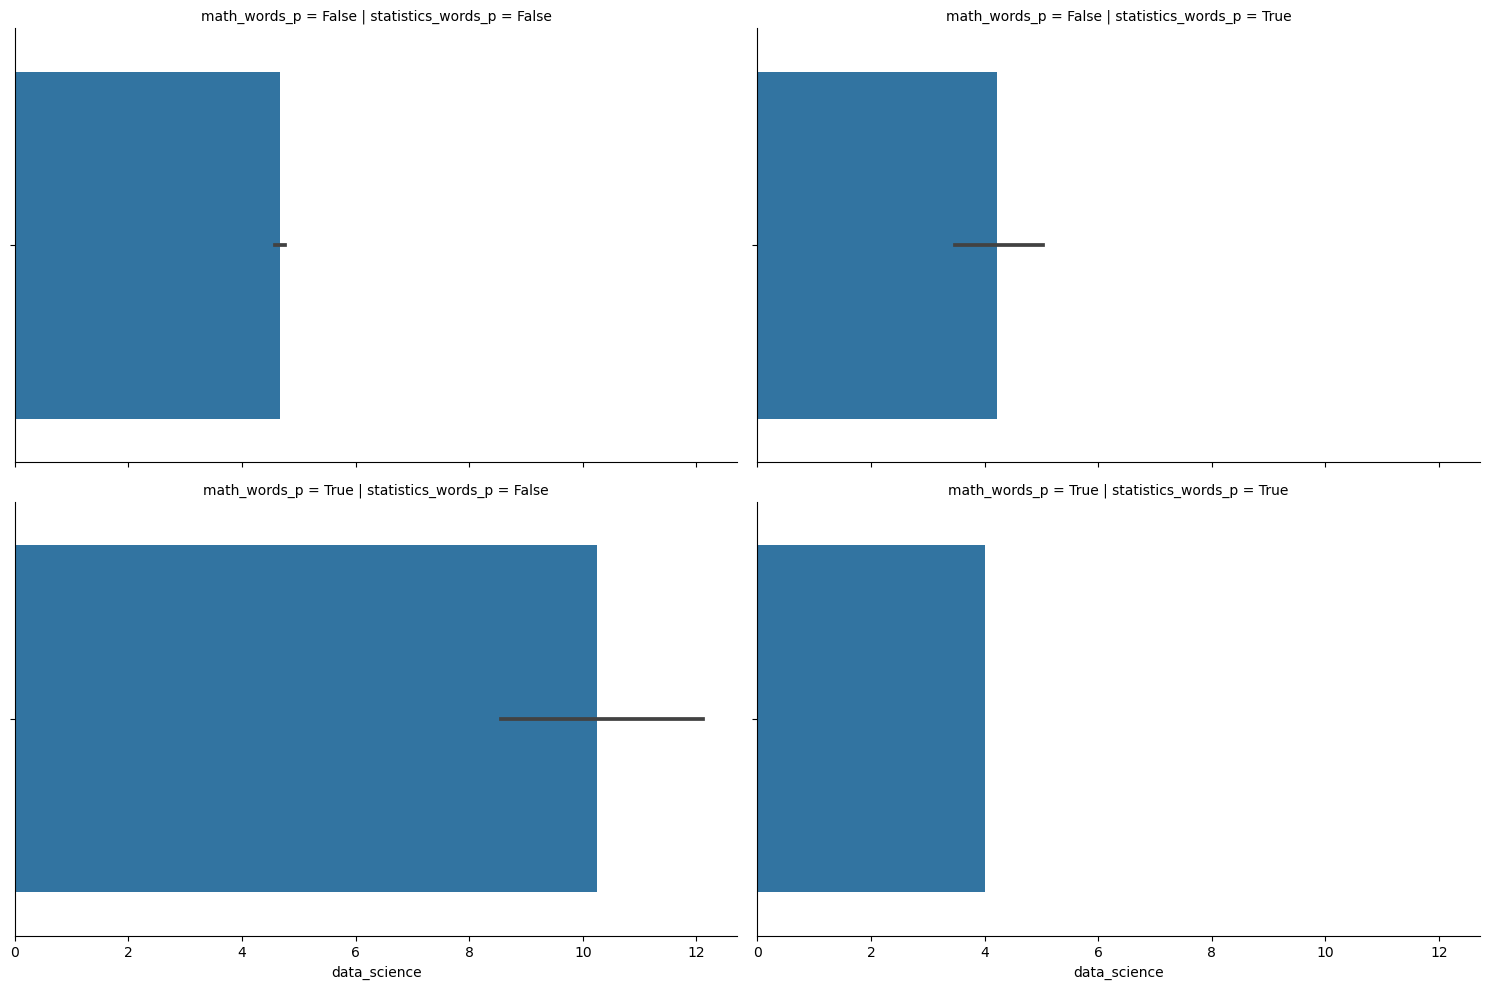

In [39]:
g = sns.catplot(x='data_science', row='math_words_p', col='statistics_words_p', data=df_math_statistics2, kind='bar', aspect=1.5)


In [40]:
df_math_statistics2.groupby(['math_words_p', 'statistics_words_p'])['data_science'].agg(['mean', 'var'])

mean        var
math_words_p statistics_words_p                      
False        False                4.676079  20.174956
             True                 4.222222  18.588123
True         False               10.255814  37.337763
             True                 4.000000        NaN

In [41]:
import pymc3 as pm

fml2 = 'data_science ~ math_words + statistics_words + math_words:statistics_words'

with pm.Model() as model2:
    pm.glm.GLM.from_formula(formula=fml2, data=df_math_statistics, family=pm.glm.families.NegativeBinomial())
    trace2 = pm.sample(4000, cores=4)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, mu, math_words:statistics_words, statistics_words, math_words, Intercept]


/Users/sho7/opt/anaconda3/envs/sample/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sho7/opt/anaconda3/envs/sample/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sho7/opt/anaconda3/envs/sample/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 90 seconds.


In [42]:
rvs2 = [rv.name for rv in strip_derived_rvs(model2.unobserved_RVs)]
rvs2

['Intercept',
 'math_words',
 'statistics_words',
 'math_words:statistics_words',
 'mu',
 'alpha']

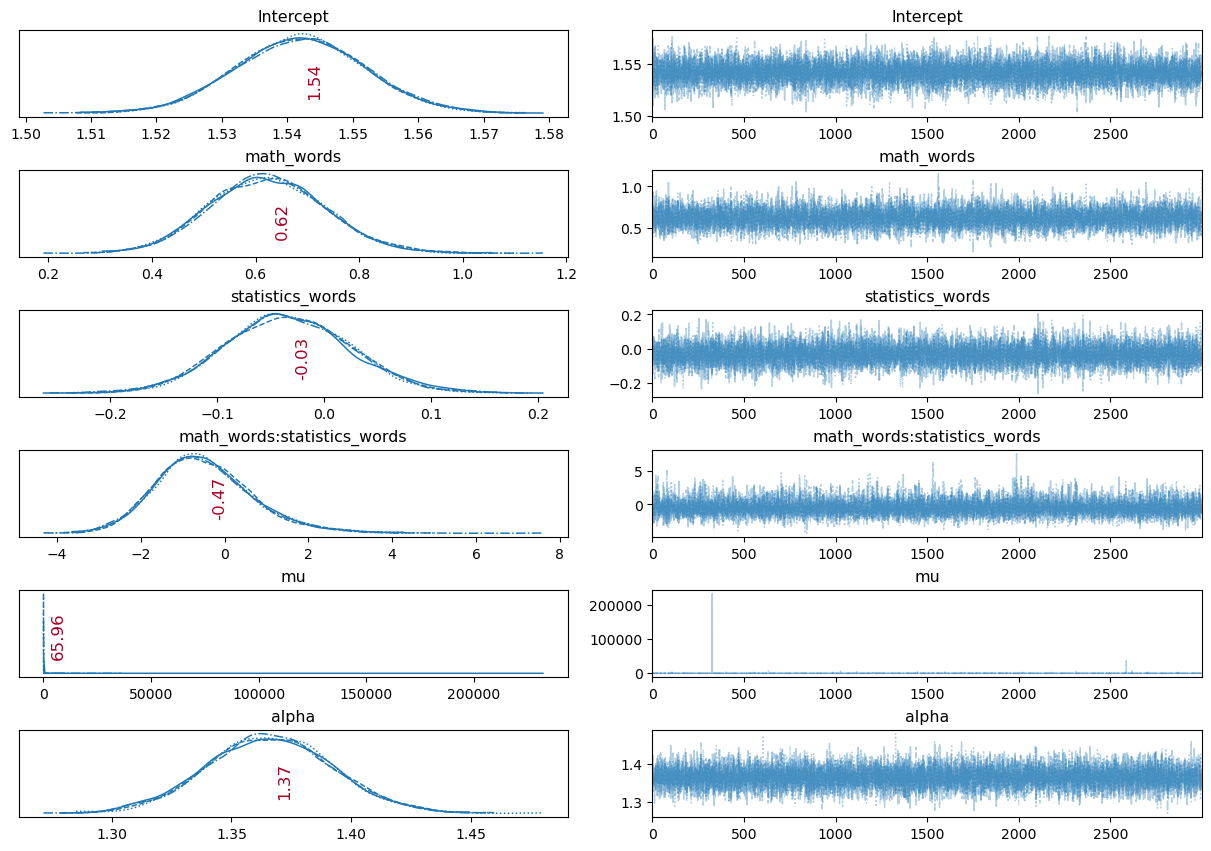

In [43]:
plot_traces(trace2[1000:], varnames=rvs2)

In [44]:
np.exp(pm.summary(trace2[1000:], var_names=rvs2))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,4.673929e+00,1.010050,4.585962,4.758821e+00,1.000000e+00,1.000000e+00,inf,inf,2.718282
math_words,1.864513e+00,1.117395,1.515886,2.293319e+00,1.001001e+00,1.001001e+00,inf,inf,2.718282
statistics_words,9.665715e-01,1.060775,0.866754,1.078963e+00,1.000000e+00,1.000000e+00,inf,inf,2.718282
math_words:statistics_words,6.225073e-01,3.257630,0.074795,6.190402e+00,1.011061e+00,1.010050e+00,inf,inf,2.718282
mu,4.422112e+28,inf,1.002002,4.002187e+43,4.028199e+08,1.215906e+06,inf,inf,2.718282
alpha,3.919641e+00,1.026341,3.735942,4.120605e+00,1.000000e+00,1.000000e+00,inf,inf,2.718282


In [45]:
fml3 = 'data_science ~ math_words_p + statistics_words_p + math_words_p:statistics_words_p'

with pm.Model() as model3:
    pm.glm.GLM.from_formula(formula=fml3, data=df_math_statistics2, family=pm.glm.families.NegativeBinomial())
    trace3 = pm.sample(4000, cores=4)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, mu, math_words_p[T.True]:statistics_words_p[T.True], statistics_words_p[T.True], math_words_p[T.True], Intercept]


/Users/sho7/opt/anaconda3/envs/sample/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sho7/opt/anaconda3/envs/sample/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 85 seconds.


In [46]:
rvs3 = [rv.name for rv in strip_derived_rvs(model3.unobserved_RVs)]
rvs3

['Intercept',
 'math_words_p[T.True]',
 'statistics_words_p[T.True]',
 'math_words_p[T.True]:statistics_words_p[T.True]',
 'mu',
 'alpha']

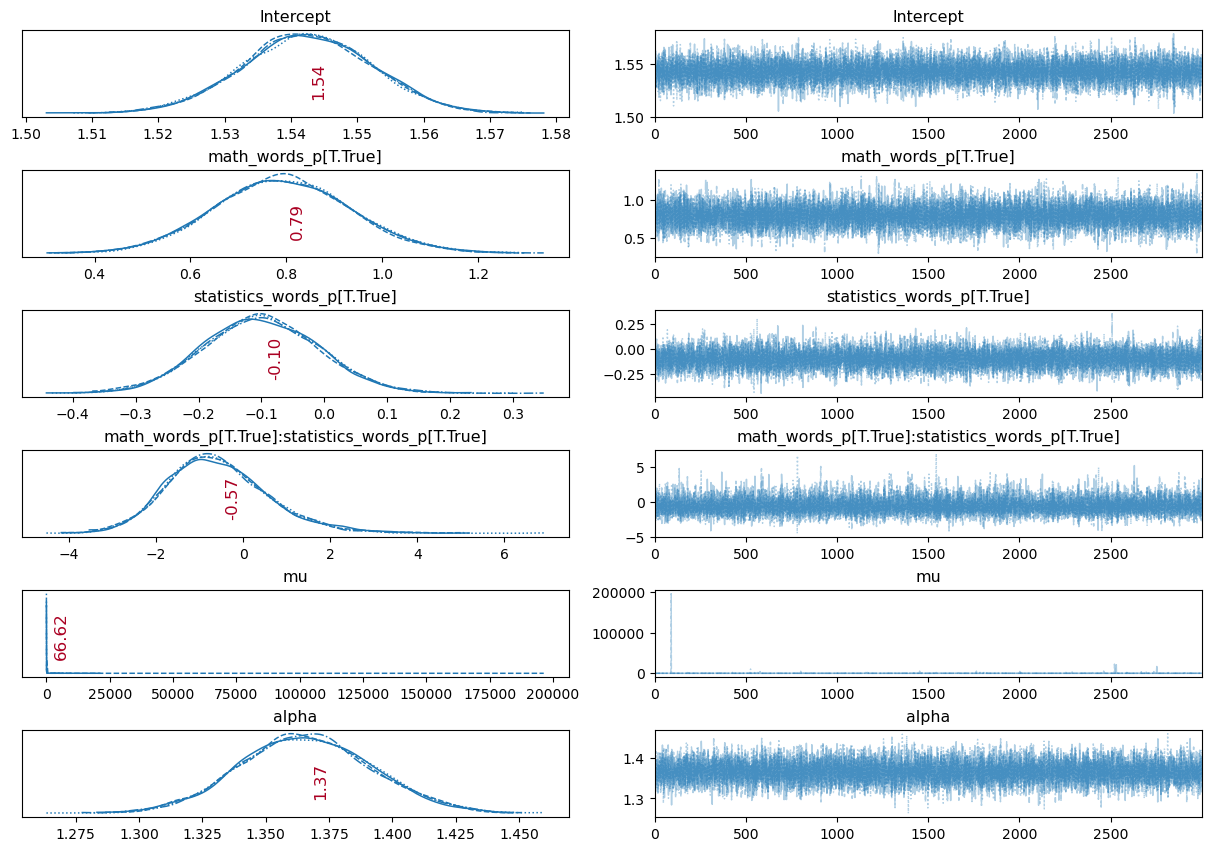

In [47]:
plot_traces(trace3[1000:], varnames=rvs3)

In [48]:
np.exp(pm.summary(trace3[1000:], var_names=rvs3))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,4.673929e+00,1.010050,4.595144,4.763582e+00,1.000000e+00,1.000000,inf,inf,2.718282
math_words_p[T.True],2.210017e+00,1.151425,1.705742,2.906646e+00,1.001001e+00,1.001001,inf,inf,2.718282
statistics_words_p[T.True],9.039330e-01,1.095269,0.762616,1.071436e+00,1.001001e+00,1.001001,inf,inf,2.718282
math_words_p[T.True]:statistics_words_p[T.True],5.632679e-01,3.241383,0.065941,5.360193e+00,1.010050e+00,1.010050,inf,inf,2.718282
mu,8.581574e+28,inf,1.003005,1.182547e+45,9.943354e+07,452254.340148,inf,inf,2.718282
alpha,3.919641e+00,1.026341,3.732208,4.116486e+00,1.000000e+00,1.000000,inf,inf,2.718282


### Now let's look at whether professor likes Dua Lipa or Max Verstappen more

In [49]:
charming_words = ['beautiful','win','sexy','good','better','love','amazing','super','nice']

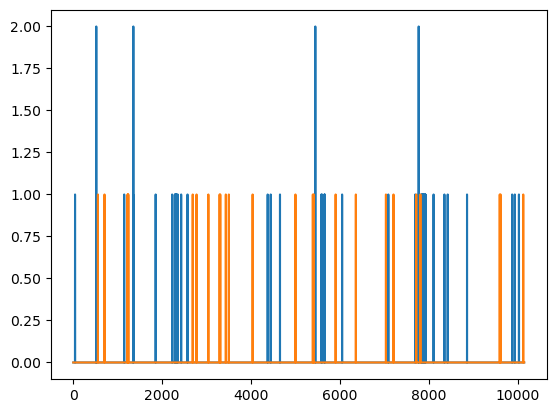

In [50]:
dua_max_occurences = get_words(dino_df[0], ['dua','max'])
dua_occurences = [v for k,v in dua_max_occurences.items() if k == 'dua'][0]
max_occurences = [v for k,v in dua_max_occurences.items() if k == 'max'][0]
#plt.plot(data_science_occurences)
plt.plot(dua_occurences)
plt.plot(max_occurences)

In [51]:
bool_dua_occurences = [bool(v) for v in dua_occurences]
bool_max_occurences = [bool(v) for v in max_occurences]

100%|█████████████████████████████████| 10148/10148 [00:00<00:00, 493293.12it/s]


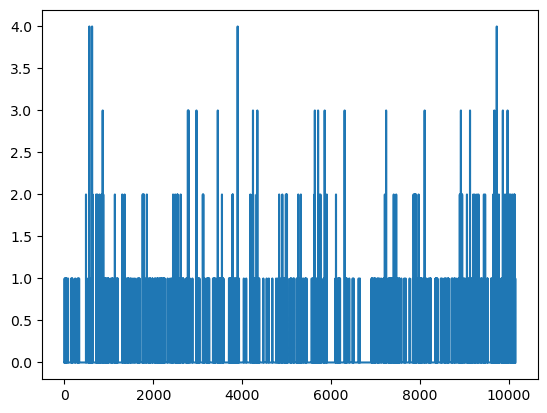

In [52]:
charming_words_occurences = get_any_words_sentences(dino_df[0], charming_words)
plt.plot(charming_words_occurences)

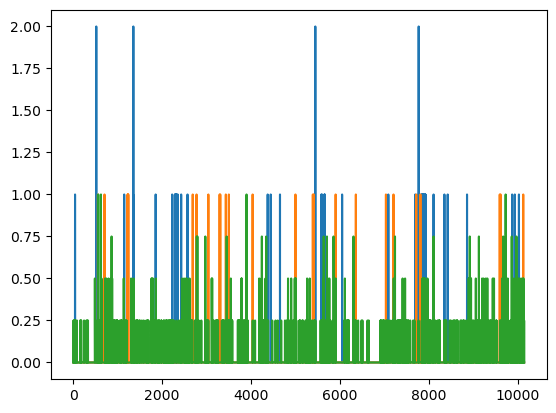

In [53]:
plt.plot(dua_occurences)
plt.plot(max_occurences)
plt.plot([m / 4 for m in  charming_words_occurences])

In [54]:
df_dua_max = pd.DataFrame(list(zip(charming_words_occurences, dua_occurences, max_occurences)), 
                        columns =['charming_words', 'dua', 'max'])
df_dua_max

,charming_words,dua,max
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
10143,0,0,0
10144,0,0,0
10145,0,0,0
10146,1,0,0


In [55]:
df_dua_max2 = pd.DataFrame(list(zip(charming_words_occurences, bool_dua_occurences, bool_max_occurences)), 
                        columns =['charming_words', 'dua_p', 'max_p'])
df_dua_max2

,charming_words,dua_p,max_p
0,0,False,False
1,0,False,False
2,0,False,False
3,0,False,False
4,0,False,False
...,...,...,...
10143,0,False,False
10144,0,False,False
10145,0,False,False
10146,1,False,False


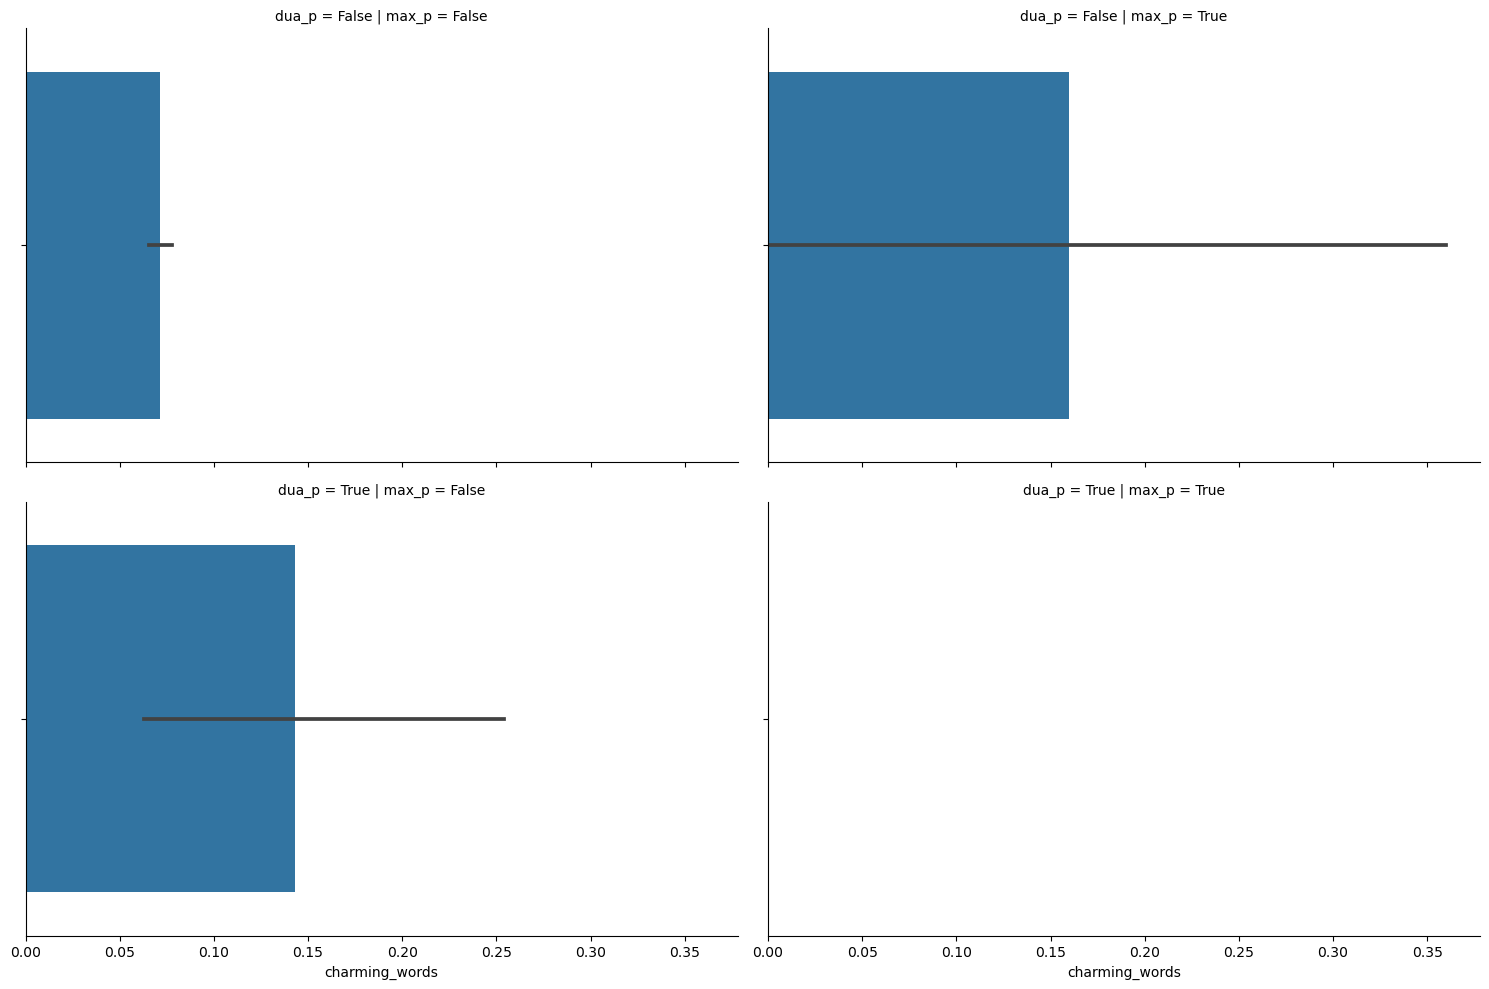

In [56]:
g = sns.catplot(x='charming_words', row='dua_p', col='max_p', data=df_dua_max2, kind='bar', aspect=1.5)

In [57]:
df_dua_max2.groupby(['dua_p', 'max_p'])['charming_words'].agg(['mean', 'var'])

mean       var
dua_p max_p                    
False False  0.071272  0.096620
      True   0.160000  0.223333
True  False  0.142857  0.156682

In [58]:
fml4 = 'charming_words ~ dua + max'

with pm.Model() as model4:
    pm.glm.GLM.from_formula(formula=fml4, data=df_dua_max, family=pm.glm.families.Poisson())
    trace4 = pm.sample(4000, cores=4)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, max, dua, Intercept]


/Users/sho7/opt/anaconda3/envs/sample/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sho7/opt/anaconda3/envs/sample/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/sho7/opt/anaconda3/envs/sample/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 40 seconds.


In [59]:
rvs = [rv.name for rv in strip_derived_rvs(model4.unobserved_RVs)]
rvs

['Intercept', 'dua', 'max', 'mu']

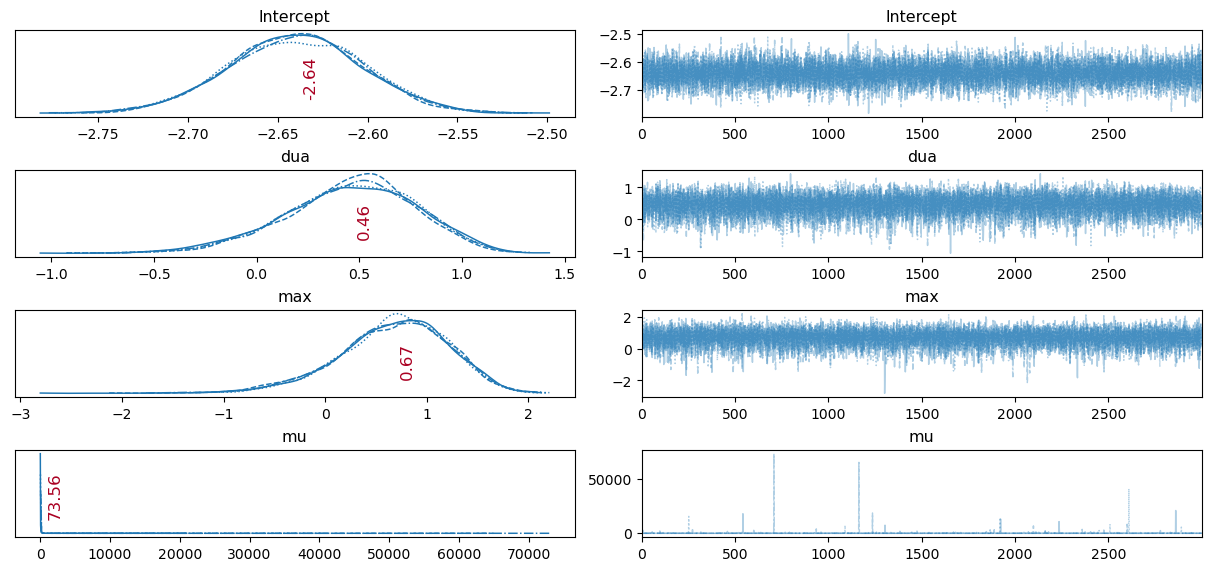

In [60]:
plot_traces(trace4[1000:], varnames=rvs);

In [61]:
np.exp(pm.summary(trace4[1000:], var_names=rvs))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,7.136127e-02,1.037693,0.066271,7.623001e-02,1.000000,1.000000,inf,inf,2.718282
dua,1.577750e+00,1.377128,0.838618,2.745601e+00,1.003005,1.002002,inf,inf,2.718282
max,1.954237e+00,1.716007,0.691425,5.053090e+00,1.005013,1.004008,inf,inf,2.718282
mu,8.853936e+31,inf,1.001001,2.778985e+46,346972.220664,8275.047993,inf,inf,2.718282
